In [74]:
from manim import *
# from classes.electrodynamics_classes import *
import jupyter_capture_output
from numpy import linalg as npl

video_scene = " -v WARNING --disable_caching ampere_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s ampere_Scene"

In [2]:
# main color of the animation (opposite of the background color)
# main_color = BLACK
# inverted_main_color = WHITE
# red_color = PURE_RED
# blue_color = PURE_BLUE
# grey_color = DARK_GREY

main_color = WHITE
inverted_main_color = BLACK
red_color = RED
blue_color = BLUE
grey_color = GREY

In [ ]:
class Conductor(Mobject):
    def __init__(self, center = np.array([-3, -1, 0]), direction = np.array([3, 0, 4]), **kwargs):
        super().__init__(**kwargs)

        self.center = center
        self.direction = direction

        # conductor
        conductor_cylinder = Cylinder(radius = 0.2, height = 10, resolution = (12, 12), direction = self.direction, checkerboard_colors = (WHITE, LIGHT_GRAY), fill_color = GREY).move_to(center)
        self.add(conductor_cylinder)


        # coordinate system
        self.e_x = UP
        self.e_z = direction / npl.norm(direction)
        self.e_y = np.cross(self.e_z, self.e_x)

        x_arrow = Arrow3D(start = self.center, end = self.center + self.e_x, color = RED)
        y_arrow = Arrow3D(start = self.center, end = self.center + self.e_y, color = BLUE)
        z_arrow = Arrow3D(start = self.center, end = self.center + self.e_z, color = BLACK)
        self.add(x_arrow, y_arrow, z_arrow)

    
    # method to return points in 3D space for given conductor coordinates (lol too easy)
    def cc2p(self, x, y, z):
        return self.center + x*self.e_x + y*self.e_y + z*self.e_z


    # mehod to get field function for a given z
    # def get_field_function(self, z_layer):
    def get_field_function(self, pos):
        x, y, z = self.cc2p(*pos)
        normalization = 1 / (x**2 + y**2 + 0.0001)
        return (-y/normalization*self.e_x + x/normalization*self.e_y)
        # return (-y/normalization*RIGHT + x/normalization*UP)
        # return self.e_z
        # return field_function


    # method to get the field for a given z value
    def get_field(self, z = 0, r_range = 2):
        # return ArrowVectorField(self.get_field_function, x_range = [-r_range, r_range], y_range = [-r_range, r_range], min_color_scheme_value=0, max_color_scheme_value=5).move_to(self.cc2p(0, 0, z))
        return
    

Output saved by creating file at animations/MX_4_Ampere/ampere_law.mp4.


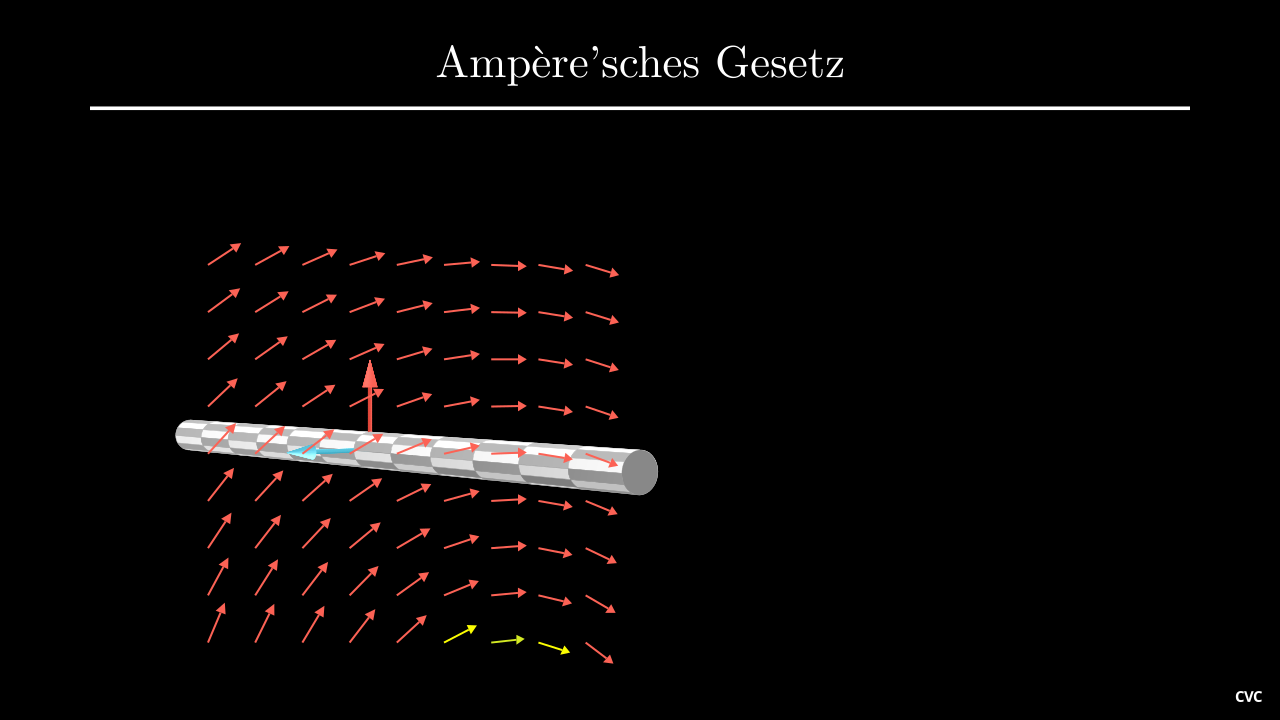

In [116]:
%%capture_video --path "animations/MX_4_Ampere/ampere_law.mp4"
%%manim -qm --fps 60 $video_scene


class ampere_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = main_color, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # headline
        headline = Title(r"Ampère'sches Gesetz", font_size = 48, color = main_color).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        self.add(headline)


        conductor = Conductor()
        conductor_field = conductor.get_field(z = 1)
        self.add(conductor, conductor_field)